_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 74, 74, 64)        256       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 16)        4624      
__________

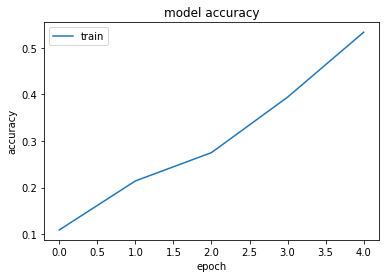

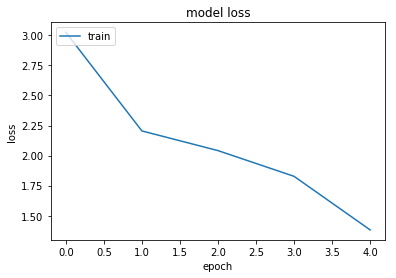

In [3]:
import os
import csv
import numpy as np
import matplotlib.image as mpimg
import random
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
from keras.layers import Dropout


with open('mydataset.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    train_images = np.zeros((789, 150, 150, 3))
    train_labels = np.zeros(789)
    n=0
    
    for row in reader:

       
        pic= mpimg.imread(row['images'])
        
        train_images[n, :, :, :] = pic
        cat= row['labels']
        train_labels[n]= cat
        n+=1
        
with open('mytestpics.csv') as csvfile:
    reader = csv.DictReader(csvfile)        
    test_images = np.zeros((100, 150, 150, 3))
    test_labels = np.zeros(100)
    n=0
    
    for row in reader:
        
       
        tpic= mpimg.imread(row['timages'])
       
        test_images[n, :, :, :] = tpic
        tcat= row['tlabels']
        test_labels[n]= tcat
        n+=1
        
        
#print(train_labels)
#print(test_labels)


shufTrain = list(zip(train_images, train_labels))        
random.shuffle(shufTrain)
train_images, train_labels = zip(*shufTrain)
train_images = np.trunc(train_images)
train_labels = np.trunc(train_labels)

shufTest = list(zip(test_images, test_labels))        
random.shuffle(shufTest) 
test_images, test_labels = zip(*shufTest)
test_images = np.trunc(test_images)
test_labels = np.trunc(test_labels)


#print(train_labels)
#print(test_labels)


from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
    
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(layers.normalization.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(32, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()


    
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=50)
   
test_loss, test_acc = model.evaluate(test_images, test_labels)
    
print("")
print(test_acc)


print(history.history.keys())

plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()